# Download S&P 500 price Data

In [60]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = "max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,0.0,0.0
2025-01-30 00:00:00-05:00,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,0.0,0.0
2025-01-31 00:00:00-05:00,6096.790039,6120.910156,6030.930176,6040.529785,4843770000,0.0,0.0


In [62]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-01-22 00:00:00-05:00', '2025-01-23 00:00:00-05:00',
               '2025-01-24 00:00:00-05:00', '2025-01-27 00:00:00-05:00',
               '2025-01-28 00:00:00-05:00', '2025-01-29 00:00:00-05:00',
               '2025-01-30 00:00:00-05:00', '2025-01-31 00:00:00-05:00',
               '2025-02-03 00:00:00-05:00', '2025-02-04 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24389, freq=None)

# Cleaning And Visualizing Stock Market Data

<Axes: xlabel='Date'>

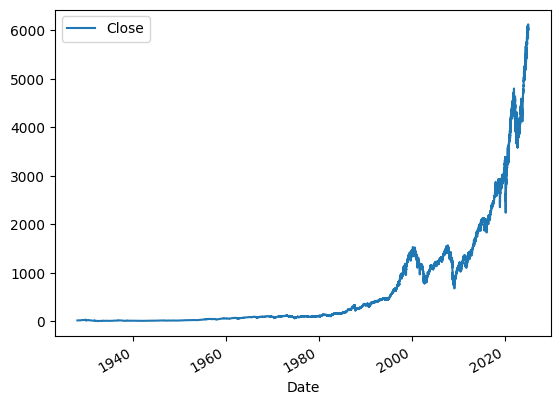

In [63]:
sp500.plot.line(y="Close", use_index = True)

In [64]:
del sp500["Dividends"]
del sp500["Stock Splits"]

# Setting Up Target For ML

In [65]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [66]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,6071.169922,1
2025-01-30 00:00:00-05:00,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,6040.529785,0
2025-01-31 00:00:00-05:00,6096.790039,6120.910156,6030.930176,6040.529785,4843770000,5994.569824,0


In [67]:
sp500 = sp500.loc["1990-01-01":].copy()

# Training Initial ML Model

In [68]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators - number of individual decision trees we want to train, higer -> higher accuracy
# min_samples_split - Protects against overfitting (Higer the less accurate but the less will overfit )
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#cant use cross validation for time series data because will look good on test set but not for real world data

# Split
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [69]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

1.0

<Axes: xlabel='Date'>

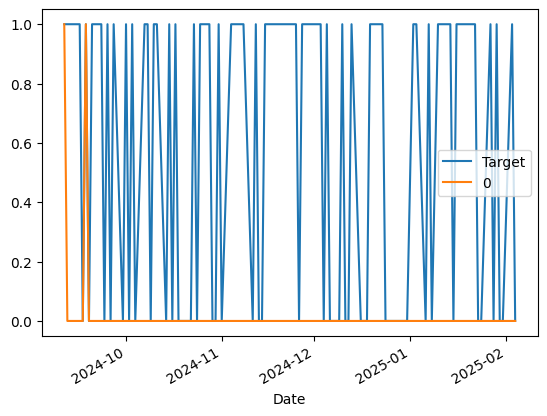

In [70]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

# Back Testing System

In [71]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [72]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [73]:
predictions = backtest(sp500, model, predictors)

In [74]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3704
1,2635


In [75]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5286527514231499

# Adding Aditional Predictors to the model

In [76]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [77]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [78]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,6071.169922,1,0.997655,1.0,0.995297,2.0,1.012142,35.0,1.094597,143.0,1.323086,527.0
2025-01-30 00:00:00-05:00,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,6040.529785,0,1.002631,1.0,1.002118,2.0,1.016444,36.0,1.099395,144.0,1.329430,527.0
2025-01-31 00:00:00-05:00,6096.790039,6120.910156,6030.930176,6040.529785,4843770000,5994.569824,0,0.997470,1.0,0.999063,2.0,1.010435,35.0,1.092948,143.0,1.322105,526.0


# Improving Model

In [79]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [80]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [81]:
predictions = backtest(sp500, model, new_predictors)

In [82]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,4478
1.0,861


In [83]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5725900116144018

In [84]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.545608
0,0.454392


In [86]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2025-01-29 00:00:00-05:00,1,0.0
2025-01-30 00:00:00-05:00,0,0.0
2025-01-31 00:00:00-05:00,0,0.0
